# Group 3 - Phase 1

Roland Joseph Baja - 301252375

# Phase 1 Requirements

Deliverables:
Phase #1
1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.
For example, look at:
a. Counts, averages
b. Distribution of the number of reviews across products
c. Distribution of the number of reviews per product
d. Distribution of reviews per user
e. Review lengths and outliers
f. Analyze lengths
g. Check for duplicates
2. Text basic pre-processing:
a. Label your data based on the value of “rating of the product” i.e. as follows:
i. Ratings 4,5: Positive
ii. Rating 3: Neutral
iii. Ratings 1,2: Negative
b. Choose the appropriate columns for your sentiment analyzer. (Give this some
thought) and mention in your report why you chose each column.
c. Check for outliers
3. Study the below three Lexicons packages and choose two for model building justify why
you chose them:
i. Valence Aware Dictionary and Sentiment Reasoner (VADR) you can find
out more information here: https://github.com/cjhutto/vaderSentiment
ii. TextBlob you can find out more information here:
https://textblob.readthedocs.io/en/dev/quickstart.html
iii. SENTIWORDNET you can find more information here:
http://nmis.isti.cnr.it/sebastiani/Publications/LREC10.pdf
4. Pre-process your text as needed, justify each pre-processing step for each model you
chose. (Note: take into account the findings of step #3 above)
5. Randomly select 1000 reviews from your dataset.
6. Modeling (Sentiment Analysis) Lexicon approach:
a. Build two sentiment analysis models using the labeled pre-processed data for
both the lexicons packages the team selected in step #3 above.
7. Validate the results of both models and provide a comparison table.
8. Presentation: Check project presentation requirements.
9. Project report: Check project report requirements/ phase #1 (Make sure you reference
your work)
10. Submit documented code.



# 1. Dataset data exploration

In [28]:
#All Imported Modules(roland)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import contractions
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


from sklearn.utils import resample
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix



In [29]:
# read and load Appliances.json to data frame(roland)
df = pd.read_json("Appliances_5.json", lines=True)

In [30]:
#dataframe information(roland)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         2277 non-null   int64 
 1   verified        2277 non-null   bool  
 2   reviewTime      2277 non-null   object
 3   reviewerID      2277 non-null   object
 4   asin            2277 non-null   object
 5   style           38 non-null     object
 6   reviewerName    2277 non-null   object
 7   reviewText      2277 non-null   object
 8   summary         2277 non-null   object
 9   unixReviewTime  2277 non-null   int64 
 10  vote            2074 non-null   object
 11  image           828 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 198.0+ KB


In [31]:
#all List of Data Frame(roland)
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2272,5,True,"12 6, 2016",A2B2JVUX5YN8RU,B0006GVNOA,NaN,Caleb,Works great. I used it and an extension kit wi...,Worked like a charm,1480982400,6,[https://images-na.ssl-images-amazon.com/image...
2273,5,True,"03 20, 2016",A1IT56MV1C09VS,B0006GVNOA,NaN,Looneypenguin,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...,1458432000,5,[https://images-na.ssl-images-amazon.com/image...
2274,5,True,"10 15, 2016",A13391AZAFJ67K,B00570RQ0A,NaN,Fred A,good,Five Stars,1476489600,NaN,NaN
2275,5,True,"01 5, 2016",A2V0JXLJ9VCNNX,B00570RQ0A,NaN,Amazon Customer,washer washing,Five Stars,1451952000,NaN,NaN


# Title/Column Description
overall - Product Rating(int64)

verified - Product Verified(bool)

reviewTime - Time of the review(object)

reviewerID - ID of the reviewer(object)

asin- ID of the Product also known as Amazon Standard Identification Number(object)

style-style of the product(object)

reviewerName- The name of the reviewer of the product(object)

reviewText- Review of the product(object)

summary- Summary of the review(object)

unixReviewTime-(int64 )

vote - Votes if review is helpful or not (object)

image- Image from the user/reviewer(object)


In [32]:
#Data Frame Description(roland)
df.describe()

,overall,unixReviewTime
count,2277.000000,2.277000e+03
mean,4.499780,1.457410e+09
std,0.837723,5.639808e+07
min,1.000000,1.221523e+09
25%,4.000000,1.449274e+09
50%,5.000000,1.478650e+09
75%,5.000000,1.482278e+09
max,5.000000,1.523923e+09


In [33]:
df.count()

overall           2277
verified          2277
reviewTime        2277
reviewerID        2277
asin              2277
style               38
reviewerName      2277
reviewText        2277
summary           2277
unixReviewTime    2277
vote              2074
image              828
dtype: int64

In [34]:
#Product  Value counts(roland)
print("Product ID Breakdown:", df['asin'].value_counts(), "\n")
print("Product Style Breakdown:", df['style'].value_counts(), "\n")
print("Verified Breakdown:", df['verified'].value_counts(), "\n")

Product ID Breakdown: asin
B0006GVNOA    2040
B0014CN8Y8      24
B00JGTUQJ6      13
B0015UGPWQ      12
B00CW0O1EW       8
B0056I99WG       8
B004XLDE5A       8
B000XXWOGW       8
B0053F80JA       7
B000NCTOUM       7
B000N6302Q       7
B00P9C66PM       7
B001DPFP88       7
B00570RQ0A       6
B00DM8J11Q       6
B00MGMWTQS       6
B001769IVI       6
B001DHLGOS       6
B00126NABC       6
B004XLDDNI       5
B00470A1S0       5
B008YDSH6E       5
B004XLDHSE       5
B004UB1O9Q       5
B00W4YKCGC       5
B00009W3PA       5
B00DM8JA7Q       5
B000VL060M       4
B0053F7TQA       4
B000XXYUSM       4
B00DM8KQ2Y       4
B00AHR3IG4       4
B0042U16YI       2
B0013DN4NI       2
B00147DFQ4       2
B00186NSGS       2
B00149JVOC       2
B000XTJRRA       2
B000W3P4AQ       2
B000VLI74Y       2
B0015S4KIO       2
B00009W3I4       1
B00BIZDI0A       1
B009PCI2JU       1
B0045LLC7K       1
B001DPQPKU       1
B0009GVYNW       1
B0042ACZU2       1
Name: count, dtype: int64 

Product Style Breakdown: style
{'

In [35]:
#Rating Value counts(roland)
print("Overall/Star Breakdown:", df['overall'].value_counts(), "\n")
print("Vote Breakdown:", df['vote'].value_counts(), "\n")

Overall/Star Breakdown: overall
5    1612
3     421
4     222
2      13
1       9
Name: count, dtype: int64 

Vote Breakdown: vote
6        412
5        208
4        206
15       206
9        206
8        206
165      206
311      204
1,917    204
3          3
2          3
7          2
11         2
309        2
1,913      2
77         2
Name: count, dtype: int64 



In [36]:
#Reviewer Value counts(roland)
print("Reviewer ID Breakdown:", df['reviewerID'].value_counts(), "\n")
print("Reviewer Name Breakdown:", df['reviewerName'].value_counts(), "\n")

Reviewer ID Breakdown: reviewerID
A8WEXFRWX1ZHH     206
A1WD61B0C3KQZB    206
A25C30G90PKSQA    206
A2B2JVUX5YN8RU    206
AMY6O4Z9HINO0     206
A3TMNU7VNK5JJE    206
A1IT56MV1C09VS    206
A2LDP3A4IE9T6T    206
A21TPY9BVC9IKZ    206
A3VYM3NY7W4MX4    206
A13391AZAFJ67K      9
A3GP2HMB2AFOKF      8
A37DQO5LU8DXTV      8
A6FPI5CM4W5WB       8
A1Y4UNHRP312HS      7
A2V0JXLJ9VCNNX      7
A26M3TN8QICJ3K      7
ALZOND1IEW8KS       7
A1EUO0BU72JR7T      7
AFUVGAUNQVT0S       6
A34A1UP40713F8      6
A3LGZ8M29PBNGG      6
A3NHUQ33CFH3VM      6
A2CIEGHZ7L1WWR      6
A11SCLK8GDDN3C      6
A1LN48DHHCKLR3      6
A2OP8DEIIUESP       6
A1T1YSCDW0PD25      6
A1H2V1GNEY4LZ0      5
A8R48NKTGCJDQ       5
A2O7BWHBIV1HWZ      5
AR3OHHHW01A8E       5
A1AHW6I678O6F2      5
A329823SXZ8IBE      5
AVGG8CYK8K312       5
A3H61AMBJ177DG      5
A1RQQV9HYHDHDN      5
A23KSPVPHZF6EO      5
A3J8IC20SGBS2O      5
A1OB2H416ARLFJ      5
A1HWFUO5PKB2RW      5
A3SM7H70QI3TY8      5
A3B1B4E184FSUZ      5
AJPRN1TD1A0SD       

In [37]:
#Time(roland)
print("unixReviewTime Breakdown:", df['unixReviewTime'].value_counts(), "\n")
print("Review Time Breakdown:", df['reviewTime'].value_counts(), "\n")


unixReviewTime Breakdown: unixReviewTime
1480982400    412
1482278400    207
1487980800    206
1299024000    206
1515974400    206
             ... 
1486339200      1
1473379200      1
1441584000      1
1411344000      1
1480896000      1
Name: count, Length: 99, dtype: int64 

Review Time Breakdown: reviewTime
12 6, 2016     412
12 21, 2016    207
02 25, 2017    206
03 2, 2011     206
01 15, 2018    206
              ... 
02 6, 2017       1
09 9, 2016       1
09 7, 2015       1
09 22, 2014      1
12 5, 2016       1
Name: count, Length: 99, dtype: int64 



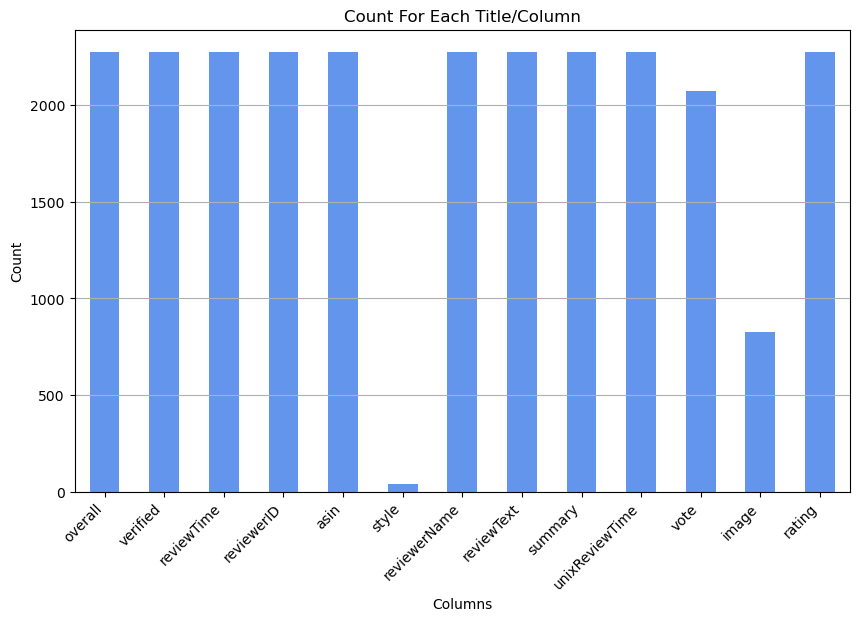

NameError: name 'savefig' is not defined

In [51]:
# Plot bar per Title(roland)
plt.figure(figsize=(10, 6))
df.count().plot(kind='bar', color='cornflowerblue')
plt.title('Count For Each Title/Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='solid', alpha=1)
plt.show()

In [39]:
#Count and Average of overall and review time(roland)

print("Overall Average =",df['overall'].mean())
print("Overall  Counts =",df['overall'].count())
print("Product ID  Counts =",df['asin'].count())

Overall Average = 4.499780412823891
Overall  Counts = 2277
Product ID  Counts = 2277


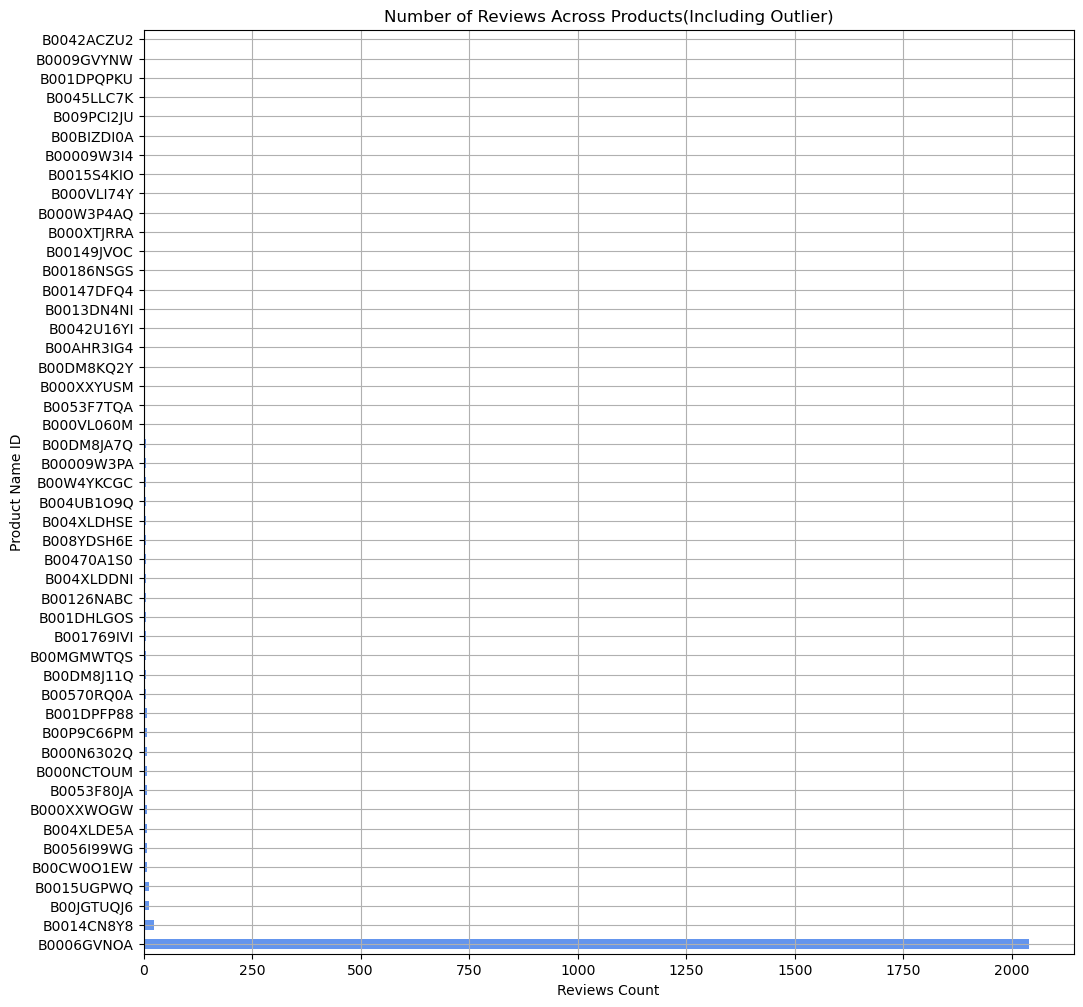

In [40]:
# number of reviews per product(roland)
plt.figure(figsize=(12, 12))
df['asin'].value_counts().plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews Across Products(Including Outlier)')
plt.ylabel('Product Name ID')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

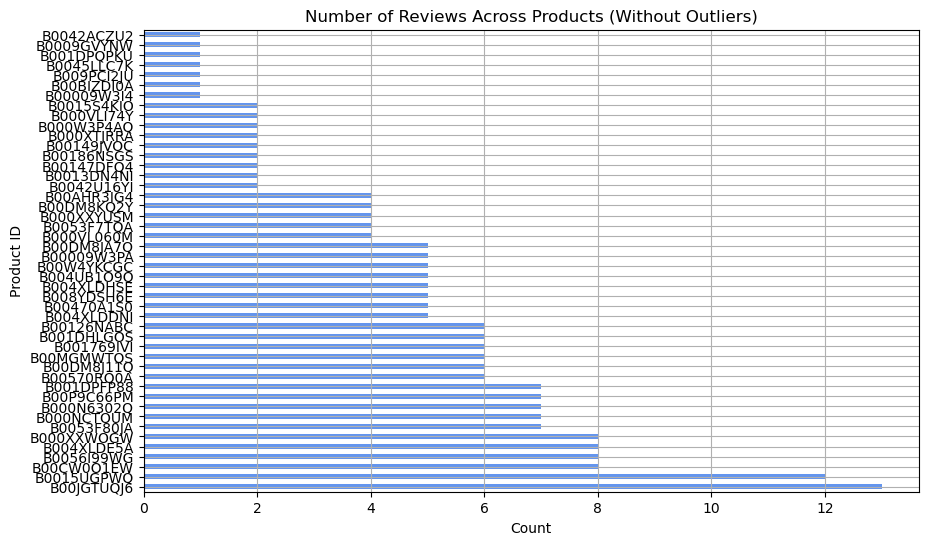

In [64]:
# Assigning Value to Q1 and Q3(roland)
Q1 = df['asin'].value_counts().quantile(0.25)
Q3 = df['asin'].value_counts().quantile(0.75)
# IQR= Interquartile range
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_quartile = Q1 - 1.5 * IQR
upper_quartile = Q3 + 1.5 * IQR

# Filter/removing outliers
filtered = df['asin'].value_counts()[(df['asin'].value_counts() >= lower_quartile) & (df['asin'].value_counts() <= upper_quartile)]

# Plot bar chart for filtered 'asin' value counts
plt.figure(figsize=(10, 6))
filtered.plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews Across Products (Without Outliers)')
plt.xlabel('Count')
plt.ylabel('Product ID')
plt.grid( linestyle='solid', alpha=1)
plt.show()

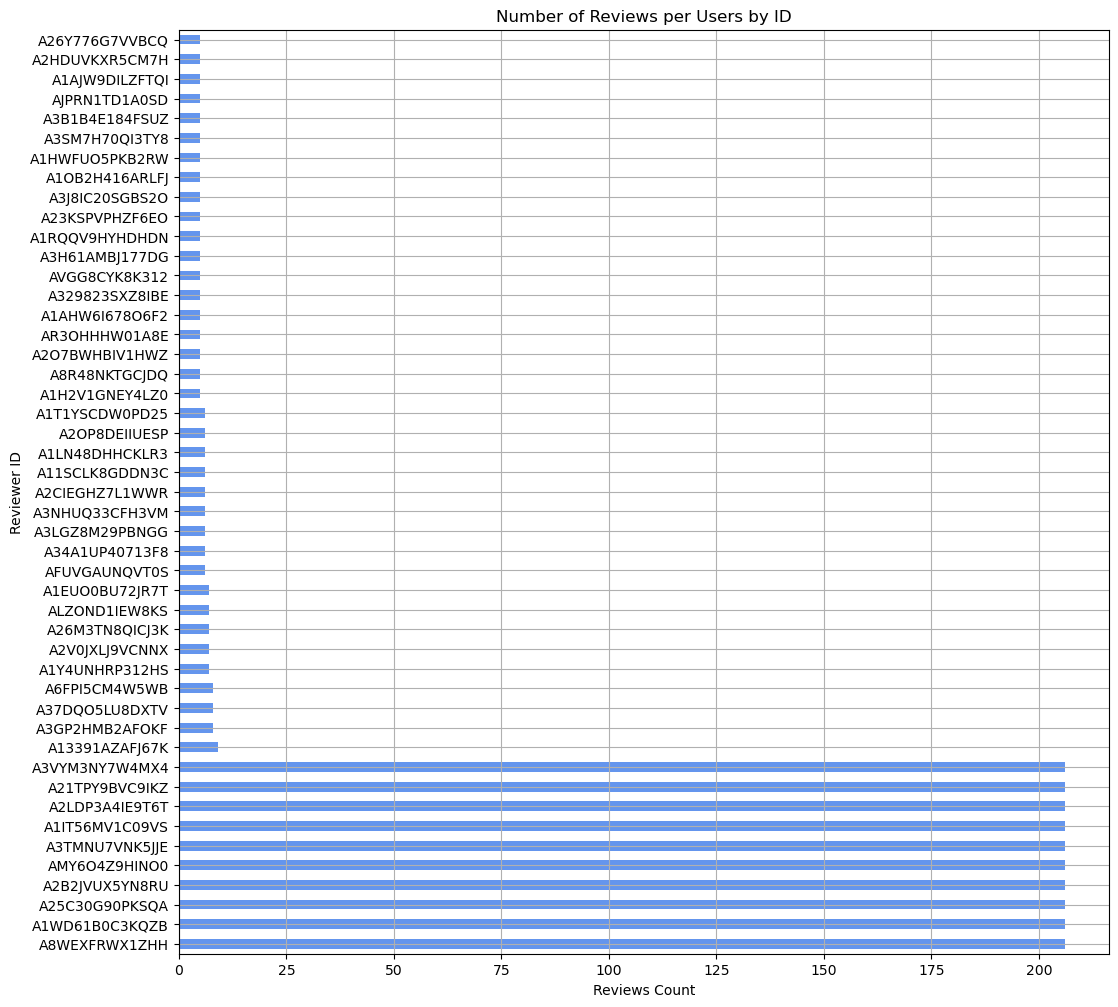

In [65]:
# number of reviews per product(roland)
plt.figure(figsize=(12, 12))
df['reviewerID'].value_counts().plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews per Users by ID')
plt.ylabel('Reviewer ID')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

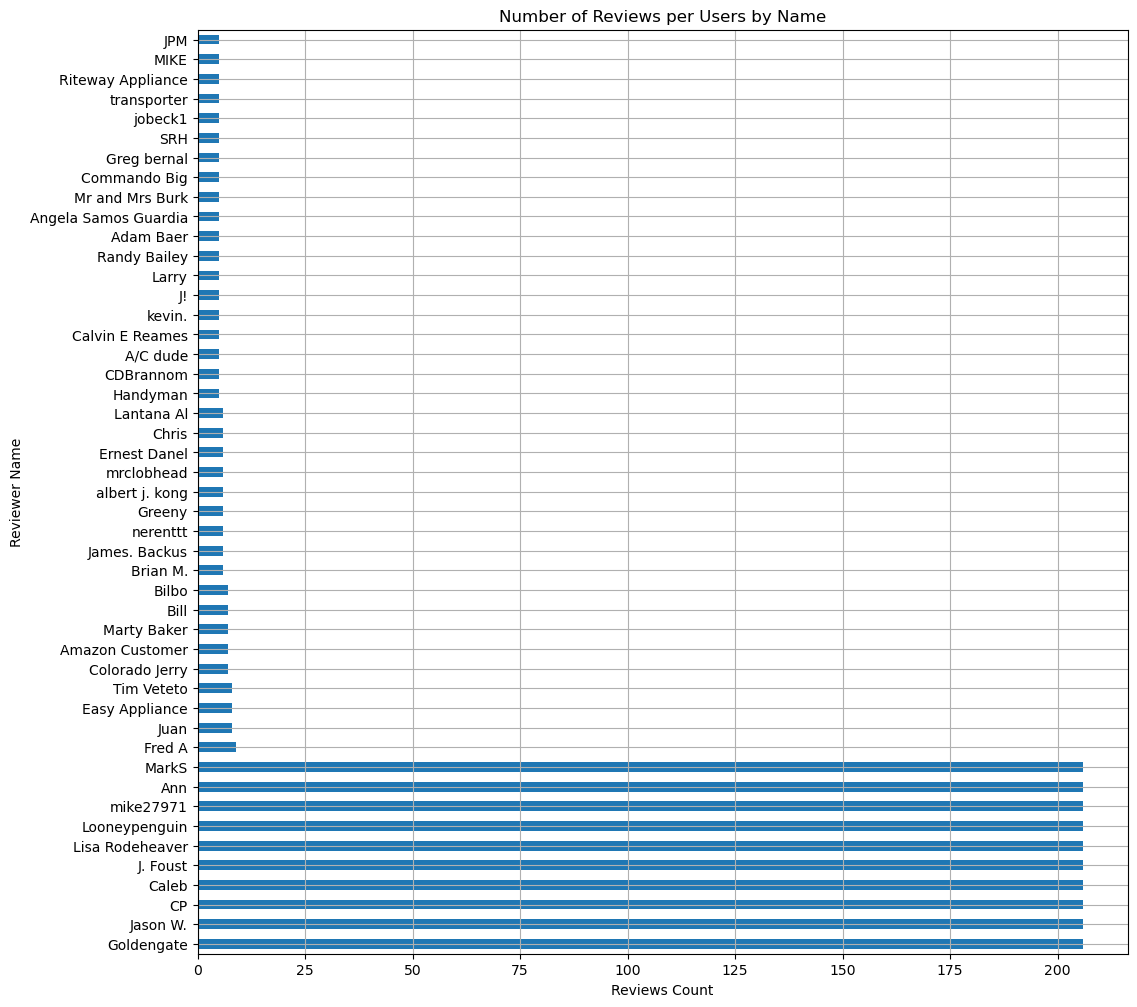

In [66]:
# number of User reviews(roland)
plt.figure(figsize=(12, 12))
df['reviewerName'].value_counts().plot(kind='barh')
plt.title('Number of Reviews per Users by Name')
plt.ylabel('Reviewer Name')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

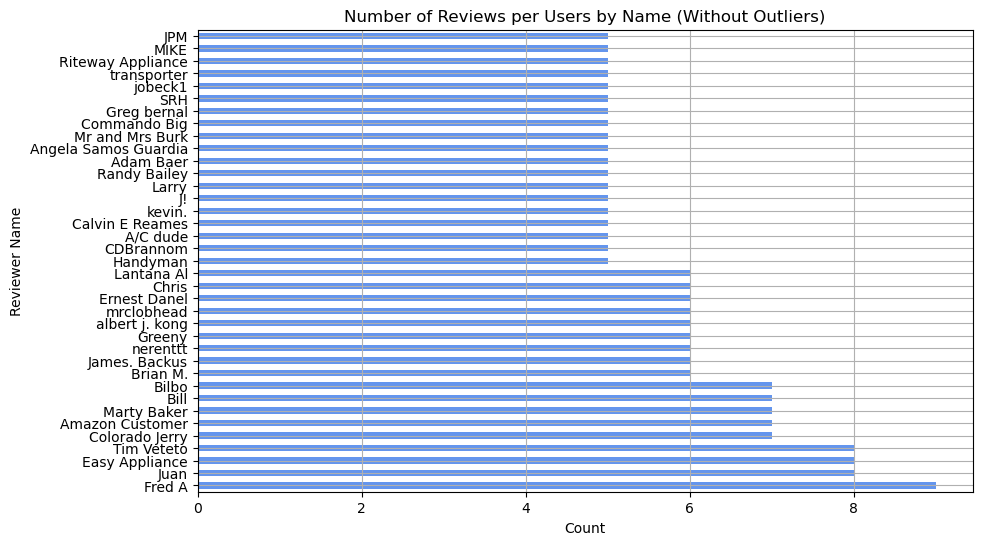

In [67]:
# Assigning Value to Q1 and Q3(roland)
Q1 = df['reviewerName'].value_counts().quantile(0.25)
Q3 = df['reviewerName'].value_counts().quantile(0.75)
# IQR= Interquartile range
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_quartile = Q1 - 1.5 * IQR
upper_quartile = Q3 + 1.5 * IQR

# Filter/removing outliers
filtered = df['reviewerName'].value_counts()[(df['reviewerName'].value_counts() >= lower_quartile) & (df['reviewerName'].value_counts() <= upper_quartile)]

# Plot bar chart for filtered 'asin' value counts
plt.figure(figsize=(10, 6))
filtered.plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews per Users by Name (Without Outliers)')
plt.xlabel('Count')
plt.ylabel('Reviewer Name')
plt.grid( linestyle='solid', alpha=1)
plt.show()

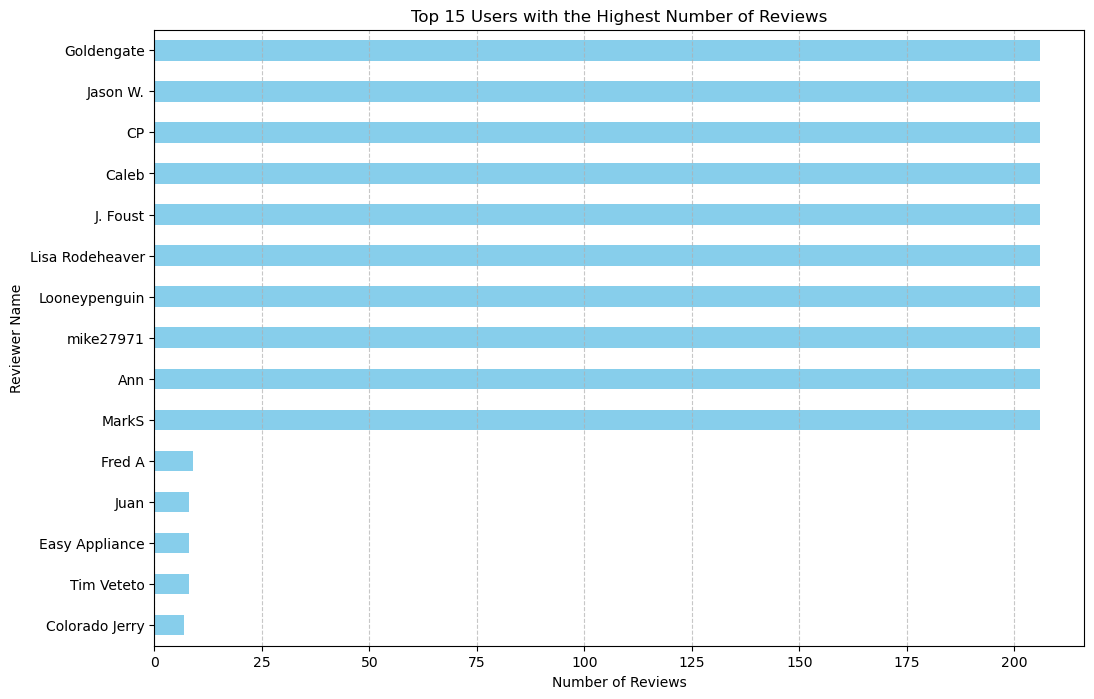

In [68]:
# plotting top 15 reviewers
plt.figure(figsize=(12, 8))
df['reviewerName'].value_counts().nlargest(15).plot(kind='barh', color='skyblue')
plt.title('Top 15 Users with the Highest Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Name')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Analyzing lengths (Christian)
plt.figure(figsize=(10, 6))
df['text_length'] = df['reviewText'].apply(len)
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Checking for duplicates (Christian)
duplicates = df[df.duplicated("reviewText")]

# Print just the content of the 'reviewText' column for duplicates found
print("Duplicates found:")
print(duplicates['reviewText'])

Number of Verified(True) vs Unverified(False) verified
True     2248
False      29
Name: count, dtype: int64


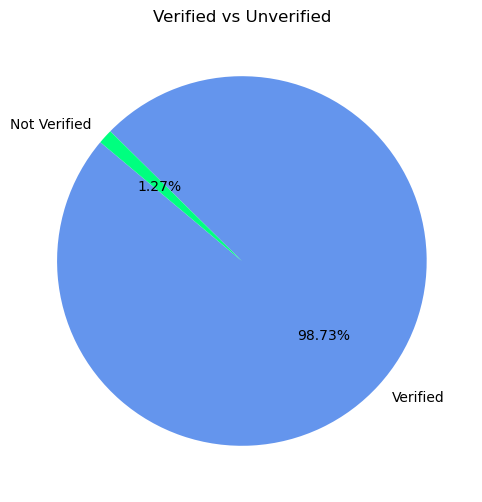

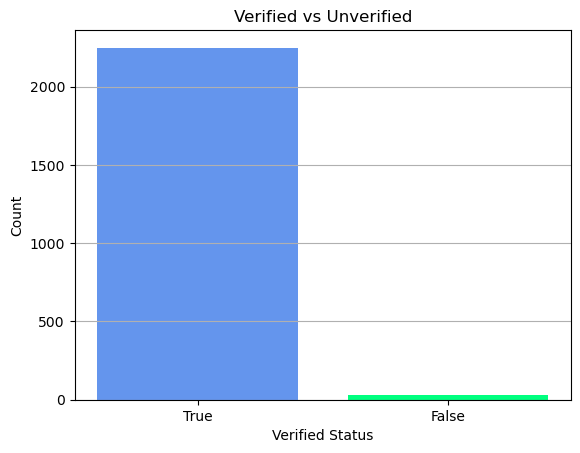

In [69]:
#verified reviews count distribution(roland)
print("Number of Verified(True) vs Unverified(False)",df['verified'].value_counts())

labels = ['Verified','Not Verified']
value_counts = df['verified'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%2.2f%%', startangle=140, colors = ['cornflowerblue', 'springgreen'])
plt.title('Verified vs Unverified')
plt.grid( linestyle='solid', alpha=1)
plt.show()

plt.bar(value_counts.index.astype(str), value_counts.values, color=['cornflowerblue', 'springgreen'])
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.title('Verified vs Unverified')
plt.grid(axis='y', linestyle='solid', alpha=1)

plt.show()

# 2. Text basic pre-processing

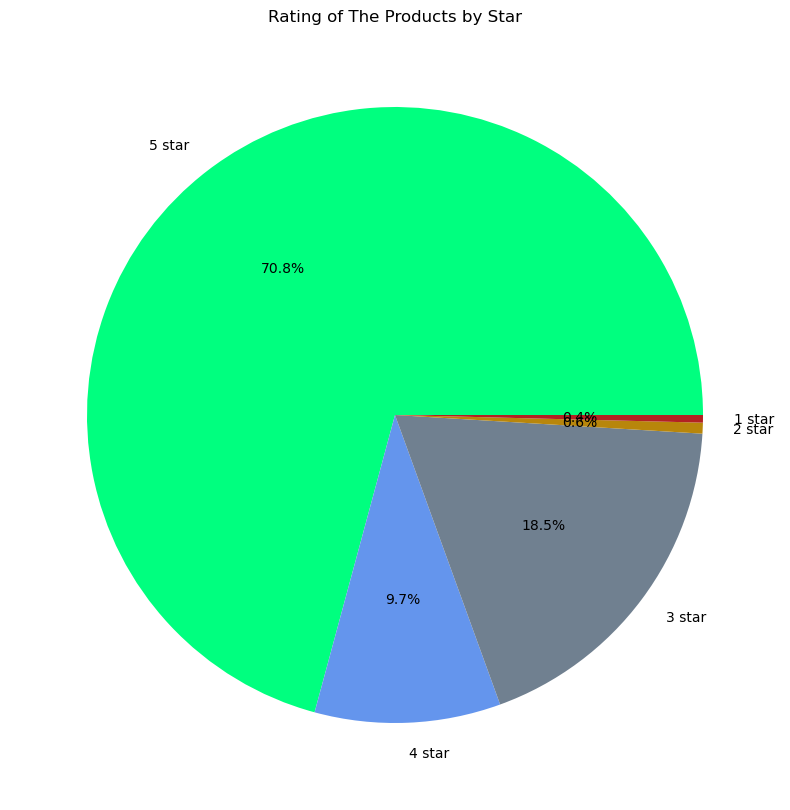

In [70]:
# Pie Chart(roland)
value_counts = df['overall'].value_counts()
min_rating = df['overall'].min()
max_rating = df['overall'].max()
labels = [f"{i} star" for i in range(max_rating, min_rating - 1, -1)]

# Sorting counts in descending order
sorted_counts = value_counts.sort_index(ascending=False)

# Plotting the pie chart with dynamically generated labels and sorted counts
plt.figure(figsize=(10, 10))
plt.pie(sorted_counts, labels=labels, autopct='%1.1f%%', labeldistance=1.10, colors = ['springgreen', 'cornflowerblue','slategray', 'darkgoldenrod','firebrick'] )
plt.title('Rating of The Products by Star')
plt.show()


Counts of each category:
rating
Positive    1834
Neutral      421
Negative      22
Name: count, dtype: int64


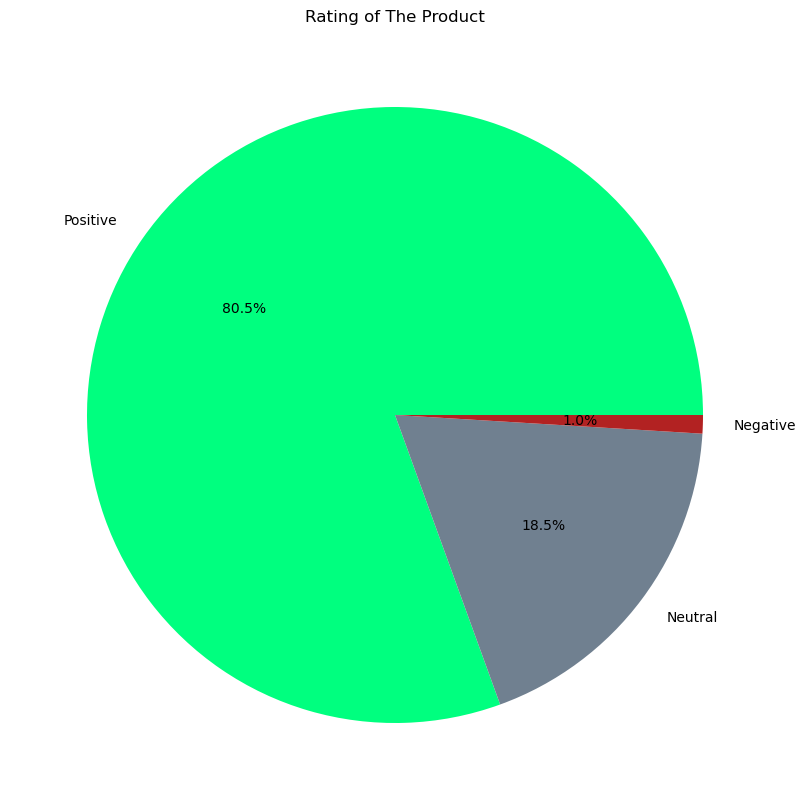

In [71]:
#pie chart with if x<2='negative', else if x = 'neutral', else 'positive'(roland)
print("Counts of each category:")

df['rating'] = df['overall'].apply(lambda x: 'Negative' if x <= 2 else ('Neutral' if x == 3 else 'Positive'))
print(df['rating'].value_counts())
plt.figure(figsize=(10, 10))
plt.pie(df['rating'].value_counts(), labels=df['rating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product')
plt.show()




In [72]:
#updated df with rating column added(roland)
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,rating,reviewText_vaderValue,reviewText_vaderRating,summary_vaderValue,summary_vaderRating
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN,Positive,0.8720,Positive,0.6249,Positive
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN,Positive,0.4404,Positive,0.0000,Neutral
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN,Positive,0.7717,Positive,0.0000,Neutral
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN,Positive,0.6486,Positive,0.5719,Positive
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN,Positive,0.5719,Positive,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,5,True,"12 6, 2016",A2B2JVUX5YN8RU,B0006GVNOA,NaN,Caleb,Works great. I used it and an extension kit wi...,Worked like a charm,1480982400,6,[https://images-na.ssl-images-amazon.com/image...,Positive,0.9591,Positive,0.6369,Positive
2273,5,True,"03 20, 2016",A1IT56MV1C09VS,B0006GVNOA,NaN,Looneypenguin,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...,1458432000,5,[https://images-na.ssl-images-amazon.com/image...,Positive,0.9443,Positive,0.5719,Positive
2274,5,True,"10 15, 2016",A13391AZAFJ67K,B00570RQ0A,NaN,Fred A,good,Five Stars,1476489600,NaN,NaN,Positive,0.4404,Positive,0.0000,Neutral
2275,5,True,"01 5, 2016",A2V0JXLJ9VCNNX,B00570RQ0A,NaN,Amazon Customer,washer washing,Five Stars,1451952000,NaN,NaN,Positive,0.0000,Neutral,0.0000,Neutral


In [73]:
#making outlier for the text based on their length size(roland)
df['text_length'] = df['reviewText'].apply(len)
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_quantile = Q1 - 1.5 * IQR
upper_quantile = Q3 + 1.5 * IQR

# Identify outliers based on the lower and upper bounds
outliers = df[(df['text_length'] < lower_quantile) | (df['text_length'] > upper_quantile)]

# Display outliers
print("Text outliers based on IQR method:")
outliers[['reviewText', 'text_length', 'summary']]


Text outliers based on IQR method:


,reviewText,text_length,summary
9,"Be careful, NewAir will not stand by their pro...",3932,NewAir will not stand behind their products - ...
11,"Be careful, NewAir will not stand by their pro...",3932,NewAir will not stand behind their products - ...
38,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
77,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
118,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
...,...,...,...
2108,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2118,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2128,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2138,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...


In [74]:
# Columns that will be used for Sentiment Analysis(roland)
selected_columns = df[['overall','rating', 'reviewText','summary']]
selected_columns

,overall,rating,reviewText,summary
0,5,Positive,I like this as a vent as well as something tha...,Great product
1,5,Positive,good item,Five Stars
2,5,Positive,Fit my new LG dryer perfectly.,Five Stars
3,5,Positive,Good value for electric dryers,Perfect size
4,5,Positive,Price and delivery was excellent.,Five Stars
...,...,...,...,...
2272,5,Positive,Works great. I used it and an extension kit wi...,Worked like a charm
2273,5,Positive,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...
2274,5,Positive,good,Five Stars
2275,5,Positive,washer washing,Five Stars


In [75]:
# wordcloud installation. can be used for textblob lexicon(roland)
pip install wordcloud

SyntaxError: invalid syntax (338365108.py, line 2)

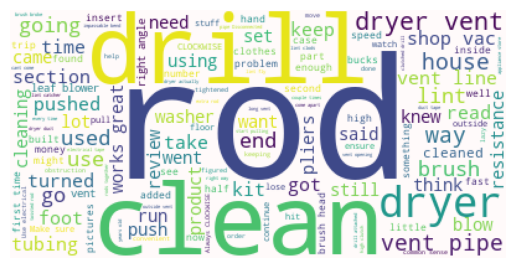

In [76]:
#wordcloud for reviewText(can be use for textblob lexicon)(roland)
from wordcloud import WordCloud
wcreviewtext = " ".join(review for review in selected_columns['reviewText'].dropna())
wordcloud = WordCloud(background_color="snow").generate(wcreviewtext)
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.show()

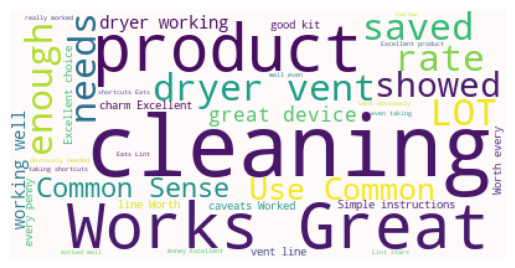

In [77]:
#wordcloud for summary(can be use for textblob lexicon)(roland)
wcreviewtext = " ".join(review for review in selected_columns['summary'].dropna())
wordcloud = WordCloud(background_color="snow").generate(wcreviewtext)
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.show()

# 3. Two Lexicons Packages

In [78]:
# need to download vader to be used(roland)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rolan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# 4. Pre-process your text as needed, justify each pre-processing step for each model you

In [79]:
# Create a SentimentIntensityAnalyzer object(roland)
sia = SentimentIntensityAnalyzer()

# Function to preprocess text using VADER and return compound sentiment score
def preprocess_text_with_vader(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [80]:
# Vader Preprocess column using reviewText(roland)
df['reviewText_vaderValue'] = df['reviewText'].apply(preprocess_text_with_vader)
df['reviewText_vaderRating'] = df['reviewText_vaderValue'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


df[['overall', 'rating', 'reviewText', 'reviewText_vaderValue', 'reviewText_vaderRating']]

,overall,rating,reviewText,reviewText_vaderValue,reviewText_vaderRating
0,5,Positive,I like this as a vent as well as something tha...,0.8720,Positive
1,5,Positive,good item,0.4404,Positive
2,5,Positive,Fit my new LG dryer perfectly.,0.7717,Positive
3,5,Positive,Good value for electric dryers,0.6486,Positive
4,5,Positive,Price and delivery was excellent.,0.5719,Positive
...,...,...,...,...,...
2272,5,Positive,Works great. I used it and an extension kit wi...,0.9591,Positive
2273,5,Positive,Anyone who thinks they don't have a problem wi...,0.9443,Positive
2274,5,Positive,good,0.4404,Positive
2275,5,Positive,washer washing,0.0000,Neutral


In [81]:
# Vader Preprocess column using summary(roland)
df['summary_vaderValue'] = df['summary'].apply(preprocess_text_with_vader)
df['summary_vaderRating'] = df['summary_vaderValue'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


df[['overall', 'rating', 'summary','summary_vaderValue', 'summary_vaderRating']]

,overall,rating,summary,summary_vaderValue,summary_vaderRating
0,5,Positive,Great product,0.6249,Positive
1,5,Positive,Five Stars,0.0000,Neutral
2,5,Positive,Five Stars,0.0000,Neutral
3,5,Positive,Perfect size,0.5719,Positive
4,5,Positive,Five Stars,0.0000,Neutral
...,...,...,...,...,...
2272,5,Positive,Worked like a charm,0.6369,Positive
2273,5,Positive,Excellent product and showed me that my vent o...,0.5719,Positive
2274,5,Positive,Five Stars,0.0000,Neutral
2275,5,Positive,Five Stars,0.0000,Neutral


# 5 Randomly select 1000 reviews from your dataset

In [82]:
# Randomly select 1000 reviews from your dataset.(roland)
random_df = df.sample(n=1000, random_state=75)
random_df


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,rating,reviewText_vaderValue,reviewText_vaderRating,summary_vaderValue,summary_vaderRating,text_length
2220,5,True,"12 10, 2014",AVGG8CYK8K312,B00DM8JA7Q,NaN,Larry,These are a great buy I replace alot of them t...,Lid switch,1418169600,NaN,NaN,Positive,0.8126,Positive,0.0000,Neutral,66
1957,5,True,"03 2, 2011",A21TPY9BVC9IKZ,B0006GVNOA,NaN,Ann,"So, this is what life comes down to when you a...",Eats Lint,1299024000,"1,917",NaN,Positive,0.8141,Positive,0.0000,Neutral,1198
900,3,True,"09 10, 2016",A3TMNU7VNK5JJE,B0006GVNOA,NaN,Lisa Rodeheaver,At first this contraption was a little confusi...,Does what it needs to,1473465600,8,NaN,Neutral,0.8606,Positive,0.0000,Neutral,971
508,5,True,"12 21, 2016",A3VYM3NY7W4MX4,B0006GVNOA,NaN,MarkS,This review is for Gardus RLE202 LintEater 10-...,5 stars isn't enough to rate this product! It'...,1482278400,15,NaN,Positive,0.9737,Positive,0.5242,Positive,3421
1980,3,True,"09 10, 2016",A3TMNU7VNK5JJE,B0006GVNOA,NaN,Lisa Rodeheaver,At first this contraption was a little confusi...,Does what it needs to,1473465600,8,NaN,Neutral,0.8606,Positive,0.0000,Neutral,971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,3,True,"12 6, 2016",A25C30G90PKSQA,B0006GVNOA,NaN,CP,first thing first: it works. the kit is great ...,good kit with some caveats,1480982400,6,NaN,Neutral,0.8544,Positive,0.4404,Positive,1196
576,5,True,"12 5, 2015",A2LDP3A4IE9T6T,B0006GVNOA,NaN,mike27971,We have 24 foot of solid dryer vent pipe endin...,This really worked well even taking shortcuts,1449273600,165,[https://images-na.ssl-images-amazon.com/image...,Positive,0.9483,Positive,0.3353,Positive,1864
1170,3,True,"09 10, 2016",A3TMNU7VNK5JJE,B0006GVNOA,NaN,Lisa Rodeheaver,At first this contraption was a little confusi...,Does what it needs to,1473465600,8,NaN,Neutral,0.8606,Positive,0.0000,Neutral,971
1705,5,True,"02 25, 2017",A8WEXFRWX1ZHH,B0006GVNOA,NaN,Goldengate,I bought this last October and finally got aro...,A great device that has my dryer working well ...,1487980800,311,NaN,Positive,0.9734,Positive,0.7351,Positive,1662


# 6. Modeling (Sentiment Analysis) Lexicon approach:

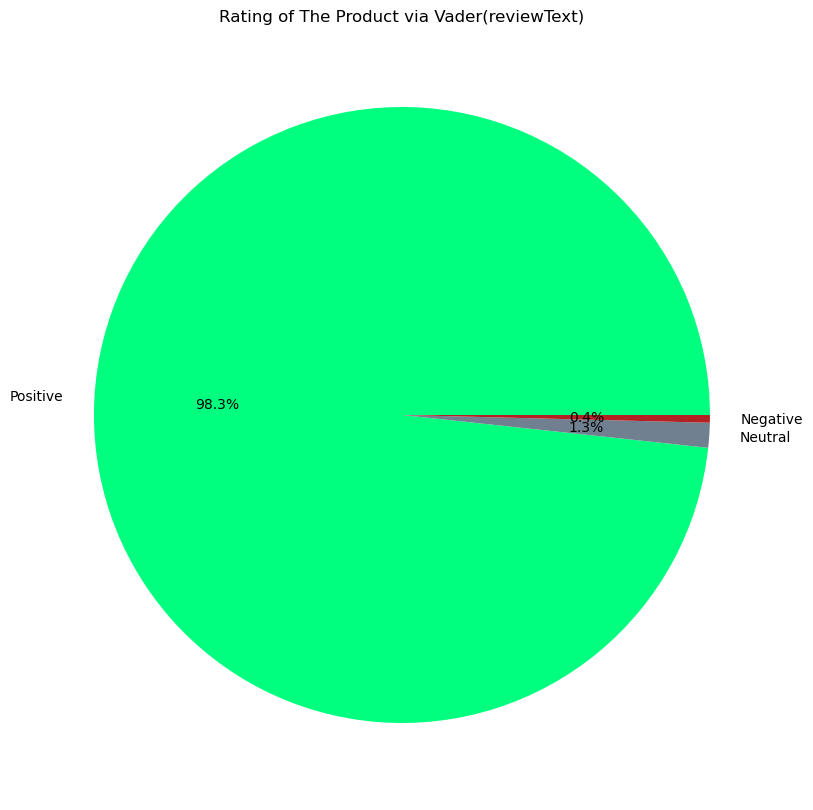

Counts of each category:
reviewText_vaderRating
Positive    983
Neutral      13
Negative      4
Name: count, dtype: int64


In [83]:
# Vader modeling/plotting using reviewText_vaderRating(roland)
plt.figure(figsize=(10, 10))
plt.pie(random_df['reviewText_vaderRating'].value_counts(), labels=random_df['reviewText_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product via Vader(reviewText)')
plt.show()

print("Counts of each category:")
print(random_df['reviewText_vaderRating'].value_counts())

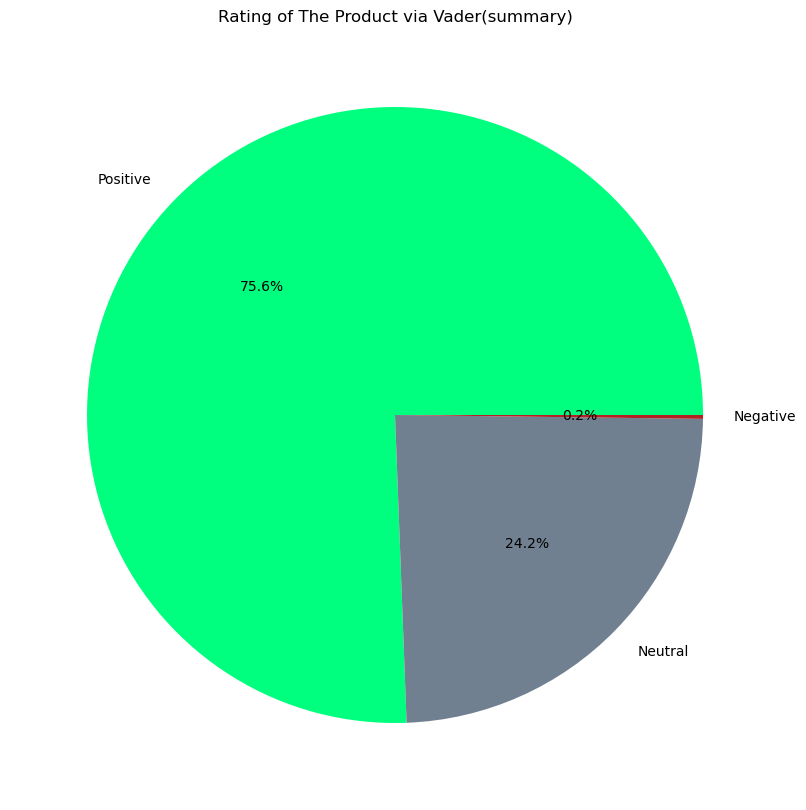

Counts of each category:
summary_vaderRating
Positive    756
Neutral     242
Negative      2
Name: count, dtype: int64


In [84]:
# Vader modeling/plotting using summary_vaderRating(roland)
plt.figure(figsize=(10, 10))
plt.pie(random_df['summary_vaderRating'].value_counts(), labels=random_df['summary_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product via Vader(summary)')
plt.show()

print("Counts of each category:")
print(random_df['summary_vaderRating'].value_counts())

Counts of each category for reviewText_vaderRating:
reviewText_vaderRating
Positive    983
Neutral      13
Negative      4
Name: count, dtype: int64

Counts of each category for summary_vaderRating:
summary_vaderRating
Positive    756
Neutral     242
Negative      2
Name: count, dtype: int64

Counts of each category for overall rating:
rating
Positive    1834
Neutral      421
Negative      22
Name: count, dtype: int64


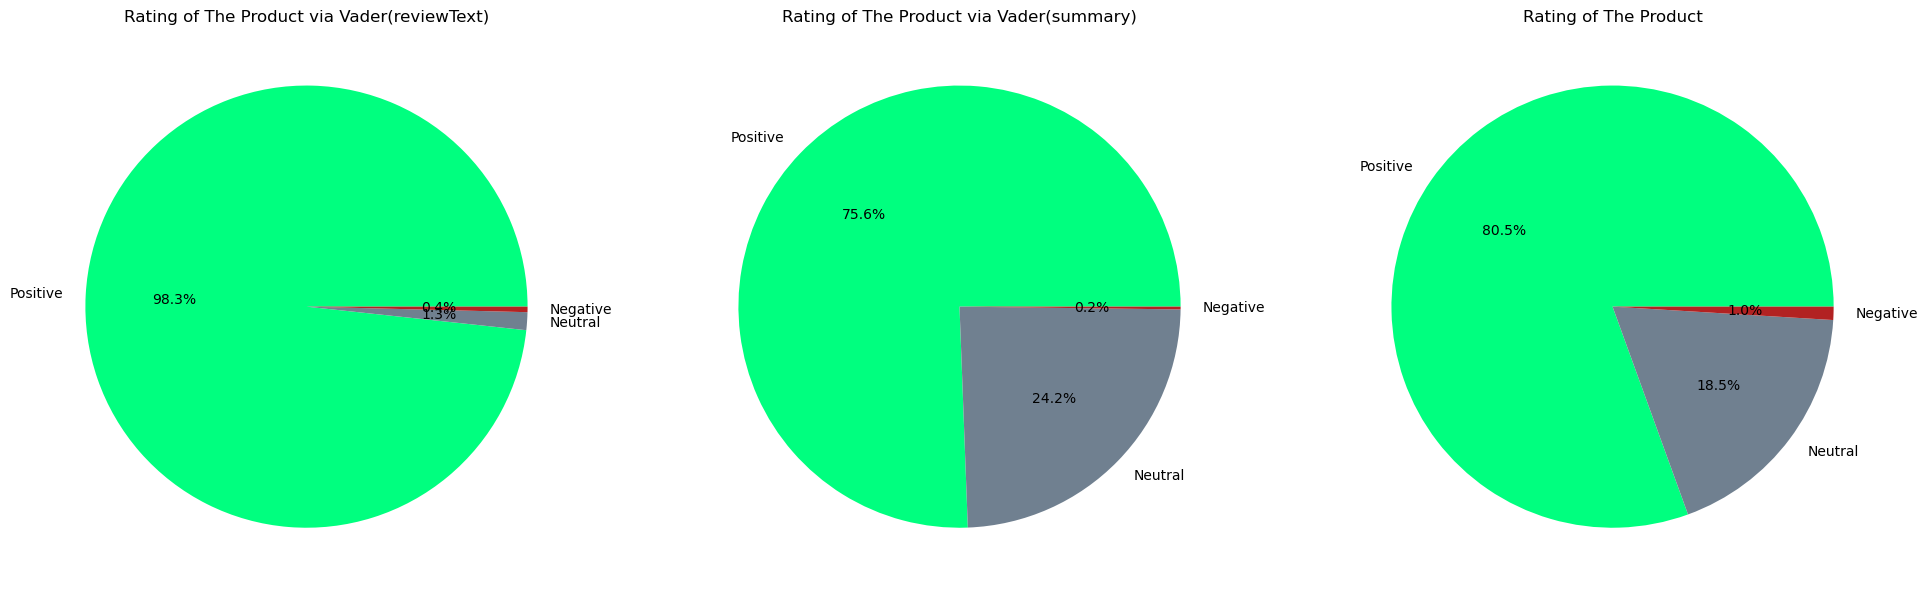

In [85]:
# Setting up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Vader modeling/plotting using reviewText_vaderRating(roland)
axes[0].pie(random_df['reviewText_vaderRating'].value_counts(), labels=random_df['reviewText_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
axes[0].set_title('Rating of The Product via Vader(reviewText)')

# Vader modeling/plotting using summary_vaderRating(roland)
axes[1].pie(random_df['summary_vaderRating'].value_counts(), labels=random_df['summary_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
axes[1].set_title('Rating of The Product via Vader(summary)')

# Pie chart with if x<2='negative', else if x = 'neutral', else 'positive'(roland)
df['rating'] = df['overall'].apply(lambda x: 'Negative' if x <= 2 else ('Neutral' if x == 3 else 'Positive'))
axes[2].pie(df['rating'].value_counts(), labels=df['rating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
axes[2].set_title('Rating of The Product')

# Show counts of each category
print("Counts of each category for reviewText_vaderRating:")
print(random_df['reviewText_vaderRating'].value_counts())
print("\nCounts of each category for summary_vaderRating:")
print(random_df['summary_vaderRating'].value_counts())
print("\nCounts of each category for overall rating:")
print(df['rating'].value_counts())

plt.tight_layout()
plt.show()


# 7. Validate the results of both models and provide a comparison table.

In [86]:
#just a guide, will be deleted 
random_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2220 to 1274
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   overall                 1000 non-null   int64  
 1   verified                1000 non-null   bool   
 2   reviewTime              1000 non-null   object 
 3   reviewerID              1000 non-null   object 
 4   asin                    1000 non-null   object 
 5   style                   13 non-null     object 
 6   reviewerName            1000 non-null   object 
 7   reviewText              1000 non-null   object 
 8   summary                 1000 non-null   object 
 9   unixReviewTime          1000 non-null   int64  
 10  vote                    916 non-null    object 
 11  image                   357 non-null    object 
 12  rating                  1000 non-null   object 
 13  reviewText_vaderValue   1000 non-null   float64
 14  reviewText_vaderRating  1000 non-null   ob

In [ ]:
from textblob import TextBlob

In [ ]:
# Function to calculate sentiment polarity using TextBlob
def calculate_textblob_polarity(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity

In [ ]:
# Function to categorize sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
# Apply TextBlob sentiment analysis to reviewText
df['reviewText_textblobPolarity'] = df['reviewText'].apply(calculate_textblob_polarity)
df['reviewText_textblobSentiment'] = df['reviewText_textblobPolarity'].apply(categorize_sentiment)

In [ ]:
# Apply TextBlob sentiment analysis to summary
df['summary_textblobPolarity'] = df['summary'].apply(calculate_textblob_polarity)
df['summary_textblobSentiment'] = df['summary_textblobPolarity'].apply(categorize_sentiment)

In [ ]:
# Display sentiment analysis results
print("Sentiment analysis results using TextBlob:")
print(df[['reviewText', 'reviewText_textblobPolarity', 'reviewText_textblobSentiment']].head())
print(df[['summary', 'summary_textblobPolarity', 'summary_textblobSentiment']].head())

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plotting sentiment analysis results for reviewText
plt.figure(figsize=(10, 6))
df['reviewText_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Sentiment Analysis of reviewText using TextBlob')
plt.ylabel('')
plt.show()

In [ ]:
# Plotting sentiment analysis results for summary
plt.figure(figsize=(10, 6))
df['summary_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Sentiment Analysis of summary using TextBlob')
plt.ylabel('')
plt.show()

In [ ]:
# Setting up subplots for comparison with VADER results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting sentiment analysis results for reviewText
df['reviewText_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=['springgreen', 'slategray', 'firebrick'])
axes[0].set_title('Sentiment Analysis of reviewText using TextBlob')
axes[0].set_ylabel('')

# Plotting sentiment analysis results for summary
df['summary_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=['springgreen', 'slategray', 'firebrick'])
axes[1].set_title('Sentiment Analysis of summary using TextBlob')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Phase 2

In [ ]:
# Load the full dataset (Christian)
full_dataset = pd.read_json('Appliances.json', lines=True)

In [ ]:
# Full set (Christian)
full_dataset.info

In [ ]:
# Random dataset from phase 1 (Christian)
random_df.info

In [ ]:
# Perform subtraction based on 'reviewText' column (Christian)
result_dataset = full_dataset[~full_dataset['reviewText'].isin(random_df['reviewText'])]

# Save the result dataset to a new file
result_dataset.to_json('result_dataset.json', orient='records')

In [ ]:
# Verifying result after subtracting random_df (Christian)
result_dataset.info

In [ ]:
# Shuffle the dataset (Christian)
from sklearn.utils import shuffle

result_dataset = shuffle(result_dataset)

In [ ]:
# Subset selection with the same proportion as full set (Christian)
from sklearn.model_selection import train_test_split

# Split the original dataset into features (X) and target variable (y)
X_original = result_dataset.drop('overall', axis=1)
y_original = result_dataset['overall']

# Perform stratified sampling to draw the subset of 2000 reviews from the original dataset
X_subset, _, y_subset, _ = train_test_split(X_original, y_original, test_size=2000, stratify=y_original, random_state=75)

# Combine X_subset and y_subset into one dataframe
subset = pd.concat([X_subset, y_subset], axis=1)

In [ ]:
# Data exploration (Christian)
# Check the structure of the subset
print("Dataset structure:")
print(subset.info())

In [ ]:
# Summary statistics of numerical features (Christian)
print("Summary statistics:")
print(subset.describe())

In [ ]:
# (Christian)
subset.count()

In [ ]:
# Checking for missing values (Christian)
missing_values = subset.isnull().sum()
print(missing_values)

In [ ]:
# Replace missing values in 'style' and 'image' columns with a placeholder value (Christian)
subset['vote'].fillna('missing', inplace=True)
subset['style'].fillna('missing', inplace=True)
subset['image'].fillna('missing', inplace=True)

In [ ]:
# Verifying after replacing missing values (Christian)
missing_values = subset.isnull().sum()
print(missing_values)

In [ ]:
# Data preprocessing (Christian)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Text cleaning (Christian)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')
nltk.download('punkt')

# Initialize stemmer and tokenizer
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

# Download stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Tokenize text
    words = tokenizer.tokenize(text)
    
    # Remove stopwords and stem each word
    cleaned_words = [stemmer.stem(word.lower()) for word in words if word.lower() not in stop_words]
    
    # Join cleaned words back into a string
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

# Apply cleaning function to the reviewText column
subset['cleaned_reviewText'] = subset['reviewText'].apply(clean_text)

# Printing the first few rows for verification
for index, row in subset.head().iterrows():
    print("Original:")
    print(row['reviewText'])
    print("Cleaned:")
    print(row['cleaned_reviewText'])
    print("-------------------------------")

In [ ]:
# Tokenization (Christian)
subset['reviewText_tokens'] = subset['cleaned_reviewText'].apply(word_tokenize)

# Print the first few rows to verify
print(subset[['cleaned_reviewText', 'reviewText_tokens']].head())

In [ ]:
# Stopword removal (Christian)
# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Apply stopword removal to the tokenized review text in the subset DataFrame
subset['reviewText_tokens_without_stopwords'] = subset['reviewText_tokens'].apply(remove_stopwords)

# Print the first few rows to verify
print(subset[['reviewText_tokens', 'reviewText_tokens_without_stopwords']].head())

In [ ]:
# Lemmatization (Christian)
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the tokenized review text without stopwords in the subset DataFrame
subset['reviewText_tokens_lemmatized'] = subset['reviewText_tokens_without_stopwords'].apply(lemmatize_tokens)

# Print the first few rows to verify
print(subset[['reviewText_tokens_without_stopwords', 'reviewText_tokens_lemmatized']].head())

In [ ]:
# Define a function to assign sentiment labels based on some criteria (Christian)
def assign_sentiment_label(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new column 'sentiment_label' in the DataFrame
subset['sentiment_label'] = subset['overall'].apply(assign_sentiment_label)

# Drop the 'overall' column
subset.drop(columns=['overall'], inplace=True)

In [ ]:
# Vectorization (Christian)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the lemmatized tokens into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(subset['reviewText_tokens_lemmatized'].apply(lambda x: ' '.join(x)))

# Convert the TF-IDF vectors to a DataFrame
tfidf_vectors_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the shape of the TF-IDF vectors DataFrame
print("Shape of TF-IDF vectors DataFrame:", tfidf_vectors_df.shape)

In [ ]:
# Feature selection and dimensionalty reduction (Christian)
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Feature selection using variance thresholding
selector = VarianceThreshold(threshold=0.01)
selected_features = selector.fit_transform(tfidf_vectors_df)

# Step 2: Dimensionality reduction using PCA
# Set the number of components to the minimum of the number of samples and features
n_components = min(selected_features.shape[0], selected_features.shape[1])
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(selected_features)

# Print the shape of the reduced feature matrix
print("Shape of reduced feature matrix:", reduced_features.shape)

# Visualize the explained variance ratio of each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

In [ ]:
# Checking for imbalance
class_distribution = subset['sentiment_label'].value_counts()
print("Class Distribution:")
print(class_distribution)

In [ ]:
# SMOTE and RUS to address imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

y = subset['sentiment_label']

# Display class distribution before resampling
print("Class distribution before resampling:", Counter(y))

# Define the pipeline with a dictionary for sampling_strategy
pipeline = Pipeline([
    ('over', SMOTE(sampling_strategy={'positive': 1648, 'negative': 1648, 'neutral': 1648})),
    ('under', RandomUnderSampler(sampling_strategy={'positive': 800, 'negative': 259, 'neutral': 93})),
])

# Apply resampling
X_resampled, y_resampled = pipeline.fit_resample(reduced_features, y)

# Display class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))